### Generating Dataset

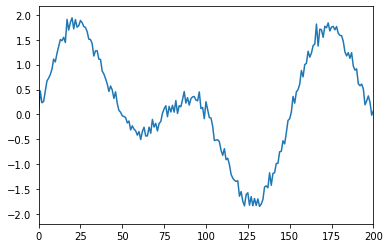

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# ===== Generating Dataset ===== #
num_data = 2400
t = np.linspace(0.0, 100.0, num_data)
y = np.sin(t) + np.sin(2*t) # + np.sin(0.4*t)
e = np.random.normal(0, 0.1, num_data)
y += e
#plt.plot(t, y)
plt.plot(y)
plt.xlim(0, 200)
seq_len = 10
X = []
y_true = []
for i in range(len(t) - seq_len):
    X.append(t[i : i+seq_len])
    y_true.append(y[i+seq_len])
X = np.array(X)
y_true = np.array(y_true)

X = np.swapaxes(X, 0, 1)  # x = x.transpose()와 동일함 () (2390, 10) -> (10, 2390)
X = np.expand_dims(X, axis=2)  # (10, 2390) -> (10, 2390, 1)

### Model Define

In [34]:
import torch
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_dim, output_dim, hid_dim, batch_size):
        super(RNN, self).__init__()

        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hid_dim = hid_dim
        self.batch_size = batch_size

        self.u = nn.Linear(self.input_dim, self.hid_dim, bias=False)
        self.w = nn.Linear(self.hid_dim,   self.hid_dim, bias=False)
        self.v = nn.Linear(self.hid_dim,   self.output_dim, bias=False)
        self.act = nn.Tanh()

        self.hidden = self.init_hidden()

    def init_hidden(self, batch_size=None):
        if batch_size is None:
            batch_size = self.batch_size
        return torch.zeros(batch_size, self.hid_dim)

    def forward(self, x):
        h = self.act(self.u(x) + self.w(self.hidden))
        y = self.v(h)
        return y, h

In [35]:
import torch.optim as optim

model = RNN(1, 1, 10, 2390)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)
epoch = 30

# ===== Train ===== #

for i in range(epoch):
    model.train()
    model.zero_grad()
    optimizer.zero_grad()
    model.hidden = model.init_hidden()

    for x in X:
        x = torch.Tensor(x).float()
        y_pred, hidden = model(x)
        model.hidden = hidden

    y_true = torch.Tensor(y_true).float()
    loss = loss_fn(y_pred.view(-1), y_true.view(-1))
    loss.backward()
    optimizer.step()
    print(loss.item())

1.784328818321228
1.5261943340301514
1.3565332889556885
1.244020700454712
1.168448567390442
1.1171395778656006
1.08231520652771
1.0589404106140137
1.0434237718582153
1.0331934690475464
1.0264745950698853
1.0220717191696167
1.0191904306411743
1.0173059701919556
1.0160739421844482
1.0152682065963745
1.0147408246994019
1.0143953561782837
1.014168381690979
1.0140185356140137
1.0139193534851074
1.0138529539108276
1.013808250427246
1.0137771368026733
1.013755440711975
1.0137394666671753
1.0137274265289307
1.0137178897857666
1.0137100219726562
1.0137031078338623


(10, 2390, 1)
(10, 1, 1)
2390


(0.0, 200.0)

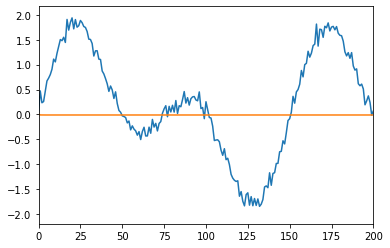

In [43]:
print(X.shape)
test_X = np.expand_dims(X[:, 0, :], 1)
print(test_X.shape)

list_y_pred = []

model.eval()
with torch.no_grad():
    model.hidden = model.init_hidden(batch_size=1)

    for x in test_X:
        x = torch.Tensor(x).float()
        y_pred, hidden = model(x)
        model.hidden = hidden

    list_y_pred.append(y_pred.view(-1).item())
    for i in range(2389):
        y_pred, hidden = model(y_pred)
        list_y_pred.append(y_pred.view(-1).item())
    
    print(len(list_y_pred))
plt.plot(y)
plt.plot(list_y_pred)
plt.xlim(0, 200)

In [1]:
import pandas as pd
import pandas_datareader as pdr
print(pdr.__version__)

#df = pdr.DataReader('AAPL', 'yahoo')
#df

0.9.0
